# Neurális háló tanítása

#### A hiperparamétereket az optim.ipynb-ben választjuk ki, a hálót felépítő osztályok és metódusok pedig a model.ipynb-ből származnak
Kezdjük a modulok hivatkozásával

In [1]:
import sys
sys.path.append('c:\\users\\ifjto\\appdata\\local\\programs\\python\\python37\\lib\\site-packages')
import numpy as np
import import_ipynb
from model import *
import numpy as np
import torch
from torch import nn
from torch.utils.data import *
import torch.optim as optim
import torch.cuda
import torchvision.transforms as transforms
import cv2
import os
import time
from IPython.display import Image
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

importing Jupyter notebook from model.ipynb


Nézzük meg, hogy tudunk-e videókártyán futtatni.

In [2]:
if torch.cuda.is_available():
    torch.cuda.manual_seed(42)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    print("CUDA available!")
else:
    print("CUDA not available!")

CUDA available!


Konstansok.

In [3]:
# the maximum number of pictures included in each epoch
TRAIN_SIZE = 1000
AUTO_LR = 1e-3
DISC_LR = 1e-4
NUM_EPOCH = 10
WD = 1e-8

Konkrét adatok beolvasása. Kötegméretnek célszerű 2 hatványt használni, a gyorsaság növelése érdekében.

In [4]:
trainloader, testloader, validationloader, discriminator_dataset, disc_loader = get_data(32, TRAIN_SIZE)

Epoch size: 1000
10936 images loaded


Konkrét autoencoder háló elkészítése. Loss függvénynek használjunk "Mean Squared Error" függvényt.

In [5]:
autoencoder = Autoencoder()
if torch.cuda.is_available():
    autoencoder = autoencoder.cuda()

Konkrét diszkriminátor elkészítése.

In [6]:
discriminator = Discriminator()
if torch.cuda.is_available():
    discriminator = discriminator.cuda()

Tanítás és loss kirajzolása

Epoch 1 of 10, Train Loss: 0.433920
Epoch 2 of 10, Train Loss: 0.270258
Epoch 3 of 10, Train Loss: 0.240072
Epoch 4 of 10, Train Loss: 0.213892
Epoch 5 of 10, Train Loss: 0.207609
	Discriminator Accuracy: 0.978000
	Discriminator Loss: 0.100652
Epoch 6 of 10, Train Loss: 4.768410
	Discriminator Accuracy: 0.995000
	Discriminator Loss: 0.021412
Epoch 7 of 10, Train Loss: 4.290010
	Discriminator Accuracy: 0.999000
	Discriminator Loss: 0.010575
Epoch 8 of 10, Train Loss: 4.154429
	Discriminator Accuracy: 0.999000
	Discriminator Loss: 0.005597
Epoch 9 of 10, Train Loss: 4.271158
	Discriminator Accuracy: 0.998000
	Discriminator Loss: 0.007021
Epoch 10 of 10, Train Loss: 3.936583
	Discriminator Accuracy: 1.000000
	Discriminator Loss: 0.004002


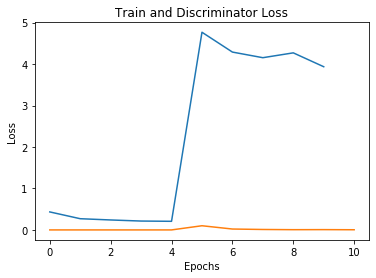

In [8]:
train_loss, disc_loss = train(
    autoencoder, discriminator, trainloader, discriminator_dataset, disc_loader, NUM_EPOCH, ratio=0.5,
    steps_without_disc=4, TRAIN_SIZE=TRAIN_SIZE, AUTO_LR=AUTO_LR, DISC_LR=DISC_LR, wd=WD)
plt.figure()
plt.plot(train_loss)
plt.title('Train and Discriminator Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(disc_loss)

Állítsunk vissza egy képet próbaként!

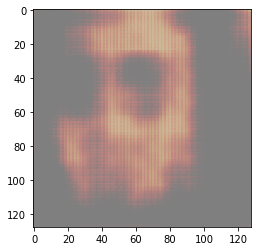

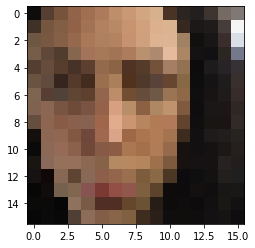

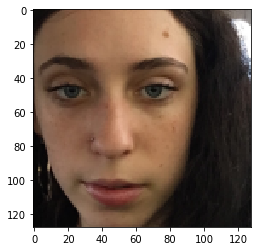

In [17]:
for data in testloader:
    pic, real = data
    redraw(autoencoder, pic)
    print_tensor(pic, 16)
    print_tensor(real)
    break